In [1]:
import pandas as pd
import numpy as np
import sys

from sklearn.impute import SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#data = pd.read_csv('ESK8170.csv', index_col=False)
data = pd.read_csv('ESK8170.csv')
data.head()

,Date Time Hour Beginning,Original Res Forecast before Lockdown,Residual Forecast,RSA Contracted Forecast,Dispatchable Generation,Residual Demand,RSA Contracted Demand,International Exports,International Imports,Thermal Generation,Nuclear Generation,Eskom Gas Generation,Eskom OCGT Generation,Hydro Water Generation,Pumped Water Generation,ILS Usage,Manual Load_Reduction(MLR),IOS Excl ILS and MLR,Dispatchable IPP OCGT,Eskom Gas SCO,Eskom OCGT SCO,Hydro Water SCO,Pumped Water SCO Pumping,Wind,PV,CSP,Other RE,Total RE,Wind Installed Capacity,PV Installed Capacity,CSP Installed Capacity,Other RE Installed Capacity,Total RE Installed Capacity,Installed Eskom Capacity,Total PCLF,Total UCLF,Total OCLF,Total UCLF+OCLF,Non Comm Sentout,Drakensberg Gen Unit Hours,Palmiet Gen Unit Hours,Ingula Gen Unit Hours
2019-04-01 12:00:00 AM,NaN,20126.707,21100.944,21035.27,21035.27,21795.048,1220.728,919.0,19988.0,1845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-1.73,0.0,-1713.0,746.888,0.0,0.0,12.890,759.778,2079.76,1474.19,500.0,21.78,4075.73,44104.0,5246.00,10828.725,766.4,11595.0,125.0,1632.0,91.5,48.0,49.77
2019-04-01 01:00:00 AM,NaN,19822.447,20826.932,20548.27,20548.27,21498.383,1195.998,834.0,19670.0,1845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-1.73,0.0,-1797.0,937.058,0.0,0.0,13.055,950.113,2079.76,1474.19,500.0,21.78,4075.73,44104.0,5246.00,10663.279,765.0,11428.0,279.0,1517.0,92.7,49.6,51.27
2019-04-01 02:00:00 AM,NaN,19726.316,20765.577,20413.27,20413.27,21409.036,1183.745,765.0,19597.0,1845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-1.73,0.0,-1790.0,982.304,0.0,0.0,13.462,995.766,2079.76,1474.19,500.0,21.78,4075.73,44104.0,5199.95,10504.001,765.0,11269.0,1.0,1496.0,94.3,51.2,52.83
2019-04-01 03:00:00 AM,NaN,19938.506,21027.756,20476.40,20476.40,21469.758,1156.881,739.0,19675.0,1845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-1.60,0.0,-1779.0,980.428,0.0,0.0,12.930,993.358,2079.76,1474.19,500.0,21.78,4075.73,44104.0,4939.00,10434.095,765.0,11199.0,95.0,1494.0,96.0,53.2,54.39
2019-04-01 04:00:00 AM,NaN,20794.305,21928.437,21156.27,21156.27,22204.397,1212.353,926.0,19871.0,1845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-1.73,0.0,-1482.0,1035.222,0.0,0.0,12.905,1048.127,2079.76,1474.19,500.0,21.78,4075.73,44104.0,4939.00,10433.393,765.0,11198.0,393.0,1501.0,97.8,55.2,56.05


In [4]:
data['Date Time Hour Beginning'] = data.index

# Reset the index to default numeric values
data.reset_index(inplace=True)

data.head(2)

,index,Date Time Hour Beginning,Original Res Forecast before Lockdown,Residual Forecast,RSA Contracted Forecast,Dispatchable Generation,Residual Demand,RSA Contracted Demand,International Exports,International Imports,Thermal Generation,Nuclear Generation,Eskom Gas Generation,Eskom OCGT Generation,Hydro Water Generation,Pumped Water Generation,ILS Usage,Manual Load_Reduction(MLR),IOS Excl ILS and MLR,Dispatchable IPP OCGT,Eskom Gas SCO,Eskom OCGT SCO,Hydro Water SCO,Pumped Water SCO Pumping,Wind,PV,CSP,Other RE,Total RE,Wind Installed Capacity,PV Installed Capacity,CSP Installed Capacity,Other RE Installed Capacity,Total RE Installed Capacity,Installed Eskom Capacity,Total PCLF,Total UCLF,Total OCLF,Total UCLF+OCLF,Non Comm Sentout,Drakensberg Gen Unit Hours,Palmiet Gen Unit Hours,Ingula Gen Unit Hours
0,2019-04-01 12:00:00 AM,2019-04-01 12:00:00 AM,20126.707,21100.944,21035.27,21035.27,21795.048,1220.728,919.0,19988.0,1845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-1.73,0.0,-1713.0,746.888,0.0,0.0,12.890,759.778,2079.76,1474.19,500.0,21.78,4075.73,44104.0,5246.0,10828.725,766.4,11595.0,125.0,1632.0,91.5,48.0,49.77
1,2019-04-01 01:00:00 AM,2019-04-01 01:00:00 AM,19822.447,20826.932,20548.27,20548.27,21498.383,1195.998,834.0,19670.0,1845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-1.73,0.0,-1797.0,937.058,0.0,0.0,13.055,950.113,2079.76,1474.19,500.0,21.78,4075.73,44104.0,5246.0,10663.279,765.0,11428.0,279.0,1517.0,92.7,49.6,51.27


Next thing we drop the 'index' column

In [5]:
data = data.drop('index', axis = 1)

In [6]:
data.tail()

,Date Time Hour Beginning,Original Res Forecast before Lockdown,Residual Forecast,RSA Contracted Forecast,Dispatchable Generation,Residual Demand,RSA Contracted Demand,International Exports,International Imports,Thermal Generation,Nuclear Generation,Eskom Gas Generation,Eskom OCGT Generation,Hydro Water Generation,Pumped Water Generation,ILS Usage,Manual Load_Reduction(MLR),IOS Excl ILS and MLR,Dispatchable IPP OCGT,Eskom Gas SCO,Eskom OCGT SCO,Hydro Water SCO,Pumped Water SCO Pumping,Wind,PV,CSP,Other RE,Total RE,Wind Installed Capacity,PV Installed Capacity,CSP Installed Capacity,Other RE Installed Capacity,Total RE Installed Capacity,Installed Eskom Capacity,Total PCLF,Total UCLF,Total OCLF,Total UCLF+OCLF,Non Comm Sentout,Drakensberg Gen Unit Hours,Palmiet Gen Unit Hours,Ingula Gen Unit Hours
43843,2024-03-31 07:00:00 PM,23823.853,25783.538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43844,2024-03-31 08:00:00 PM,22411.788,24259.815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43845,2024-03-31 09:00:00 PM,20809.611,22549.812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43846,2024-03-31 10:00:00 PM,19876.582,21347.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43847,2024-03-31 11:00:00 PM,18976.116,20313.719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(43848, 42)

In [8]:
print(data.isna().sum())

Date Time Hour Beginning                    0
Original Res Forecast before Lockdown       0
Residual Forecast                           0
RSA Contracted Forecast                  1632
Dispatchable Generation                  1632
Residual Demand                          1632
RSA Contracted Demand                    1632
International Exports                    1632
International Imports                    1632
Thermal Generation                       1632
Nuclear Generation                       1632
Eskom Gas Generation                     1632
Eskom OCGT Generation                    1632
Hydro Water Generation                   1632
Pumped Water Generation                  1632
ILS Usage                                1632
Manual Load_Reduction(MLR)               1632
IOS Excl ILS and MLR                     1632
Dispatchable IPP OCGT                    1632
Eskom Gas SCO                            1632
Eskom OCGT SCO                           1632
Hydro Water SCO                   

Out of the 43 848 rows in this dataset, from the 42 columns, 39 have at least 1 632 missing values.

In [9]:
#data[42215:43847]
data[42215:42218]

,Date Time Hour Beginning,Original Res Forecast before Lockdown,Residual Forecast,RSA Contracted Forecast,Dispatchable Generation,Residual Demand,RSA Contracted Demand,International Exports,International Imports,Thermal Generation,Nuclear Generation,Eskom Gas Generation,Eskom OCGT Generation,Hydro Water Generation,Pumped Water Generation,ILS Usage,Manual Load_Reduction(MLR),IOS Excl ILS and MLR,Dispatchable IPP OCGT,Eskom Gas SCO,Eskom OCGT SCO,Hydro Water SCO,Pumped Water SCO Pumping,Wind,PV,CSP,Other RE,Total RE,Wind Installed Capacity,PV Installed Capacity,CSP Installed Capacity,Other RE Installed Capacity,Total RE Installed Capacity,Installed Eskom Capacity,Total PCLF,Total UCLF,Total OCLF,Total UCLF+OCLF,Non Comm Sentout,Drakensberg Gen Unit Hours,Palmiet Gen Unit Hours,Ingula Gen Unit Hours
42215,2024-01-23 11:00:00 PM,20338.054,22063.054,19644.801,20437.954,22291.807,1116.652,1329.509,18689.431,796.39,0.0,0.0,286.038,-1.672,0.0,793.153,0.0,0.0,-2.127,-3.266,-0.002,-1449.499,1788.202,0.0,0.0,17.825,1806.027,3442.57,2287.09,500.0,50.58,6280.24,46686.0,8031.0,12728.702,530.0,13258.0,702.0,554.272,78.6,46.0,56.48
42216,2024-01-24 12:00:00 AM,20109.975,21543.399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42217,2024-01-24 01:00:00 AM,19921.317,21221.734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Clearly the 1632 missing values are missing on the last rows. Given the circumstances, we can delete the last 1632 rows which form about 3.7% of the records in this dataset.

In [10]:
data = data.drop(data.index[-1632:])
data.isna().sum()

Date Time Hour Beginning                  0
Original Res Forecast before Lockdown     0
Residual Forecast                         0
RSA Contracted Forecast                   0
Dispatchable Generation                   0
Residual Demand                           0
RSA Contracted Demand                     0
International Exports                     0
International Imports                     0
Thermal Generation                        0
Nuclear Generation                        0
Eskom Gas Generation                      0
Eskom OCGT Generation                     0
Hydro Water Generation                    0
Pumped Water Generation                   0
ILS Usage                                 0
Manual Load_Reduction(MLR)                0
IOS Excl ILS and MLR                      0
Dispatchable IPP OCGT                     0
Eskom Gas SCO                             0
Eskom OCGT SCO                            0
Hydro Water SCO                           0
Pumped Water SCO Pumping        

In [11]:
data.tail()

,Date Time Hour Beginning,Original Res Forecast before Lockdown,Residual Forecast,RSA Contracted Forecast,Dispatchable Generation,Residual Demand,RSA Contracted Demand,International Exports,International Imports,Thermal Generation,Nuclear Generation,Eskom Gas Generation,Eskom OCGT Generation,Hydro Water Generation,Pumped Water Generation,ILS Usage,Manual Load_Reduction(MLR),IOS Excl ILS and MLR,Dispatchable IPP OCGT,Eskom Gas SCO,Eskom OCGT SCO,Hydro Water SCO,Pumped Water SCO Pumping,Wind,PV,CSP,Other RE,Total RE,Wind Installed Capacity,PV Installed Capacity,CSP Installed Capacity,Other RE Installed Capacity,Total RE Installed Capacity,Installed Eskom Capacity,Total PCLF,Total UCLF,Total OCLF,Total UCLF+OCLF,Non Comm Sentout,Drakensberg Gen Unit Hours,Palmiet Gen Unit Hours,Ingula Gen Unit Hours
42211,2024-01-23 07:00:00 PM,25894.198,28376.198,24126.281,25649.988,28665.363,1396.706,1334.407,19631.931,796.216,0.0,0.0,603.000,1769.577,0.0,1359.707,164.0,0.0,-1.985,-4.865,0.000,-2.000,2610.141,15.632,309.972,21.085,2956.830,3442.57,2287.09,500.0,50.58,6280.24,46686.0,7921.0,12552.484,530.0,13082.0,484.0,529.028,80.6,46.8,57.84
42212,2024-01-23 08:00:00 PM,24975.517,27445.517,23421.497,24810.499,27611.319,1340.374,1322.682,19583.614,796.177,0.0,0.0,603.652,1123.185,0.0,1389.002,0.0,0.0,-2.110,-3.386,0.000,-2.318,2417.933,0.000,303.108,21.112,2742.153,3442.57,2287.09,500.0,50.58,6280.24,46686.0,7921.0,12626.477,530.0,13156.0,477.0,523.213,77.8,46.2,56.11
42213,2024-01-23 09:00:00 PM,22880.129,25205.129,21649.111,22840.523,25343.483,1247.978,1318.747,19664.400,796.102,0.0,0.0,431.477,24.056,0.0,1191.411,0.0,0.0,-1.479,-3.253,-0.001,-580.938,2249.893,0.000,174.149,21.108,2445.150,3442.57,2287.09,500.0,50.58,6280.24,46686.0,7921.0,12545.311,530.0,13075.0,311.0,536.272,75.4,45.6,55.29
42214,2024-01-23 10:00:00 PM,21394.254,23324.254,20451.255,21393.599,23522.589,1166.158,1294.526,19381.045,796.275,0.0,0.0,422.985,-1.670,0.0,942.343,0.0,0.0,-2.118,-3.399,-0.001,-1436.387,2050.691,0.000,4.064,19.315,2074.070,3442.57,2287.09,500.0,50.58,6280.24,46686.0,7937.5,12446.649,530.0,12976.0,649.0,550.251,76.2,45.6,55.66
42215,2024-01-23 11:00:00 PM,20338.054,22063.054,19644.801,20437.954,22291.807,1116.652,1329.509,18689.431,796.390,0.0,0.0,286.038,-1.672,0.0,793.153,0.0,0.0,-2.127,-3.266,-0.002,-1449.499,1788.202,0.000,0.000,17.825,1806.027,3442.57,2287.09,500.0,50.58,6280.24,46686.0,8031.0,12728.702,530.0,13258.0,702.0,554.272,78.6,46.0,56.48


The 53 missing values in the "Ingula Gen Unit Hours" column do not belong to the last rows of the dataframe. 

We can choose to delete them since they account for only 0.1255% of the remaining data. That is an insignificant number. However, if we do chose to delete these rows, that means we will lose 53 hours from the Date Time column, which will not serve a good purpose. So a better option here would be data imputaion.

In [12]:
# Impute
"""#MissForest
imputer = MissForest()
data_imputed = imputer.fit_transform(data)
data_imputed = pd.DataFrame(data=data_imputed, columns=data.columns)

# Keep only the 'Ingula Gen Unit Hours' column
data_Ingula = data[['Ingula Gen Unit Hours']].copy()
data_Ingula['Ingula Gen Unit Hours'] = data_imputed['Ingula Gen Unit Hours']

# Obtain summary statistics
data_Ingula.describe().T[['mean', 'std', 'min', '50%', 'max']]"""

#SimpleImputer
# Instantiate the SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the DataFrame to impute missing values
new_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
new_data.isna().sum()

Date Time Hour Beginning                 0
Original Res Forecast before Lockdown    0
Residual Forecast                        0
RSA Contracted Forecast                  0
Dispatchable Generation                  0
Residual Demand                          0
RSA Contracted Demand                    0
International Exports                    0
International Imports                    0
Thermal Generation                       0
Nuclear Generation                       0
Eskom Gas Generation                     0
Eskom OCGT Generation                    0
Hydro Water Generation                   0
Pumped Water Generation                  0
ILS Usage                                0
Manual Load_Reduction(MLR)               0
IOS Excl ILS and MLR                     0
Dispatchable IPP OCGT                    0
Eskom Gas SCO                            0
Eskom OCGT SCO                           0
Hydro Water SCO                          0
Pumped Water SCO Pumping                 0
Wind       

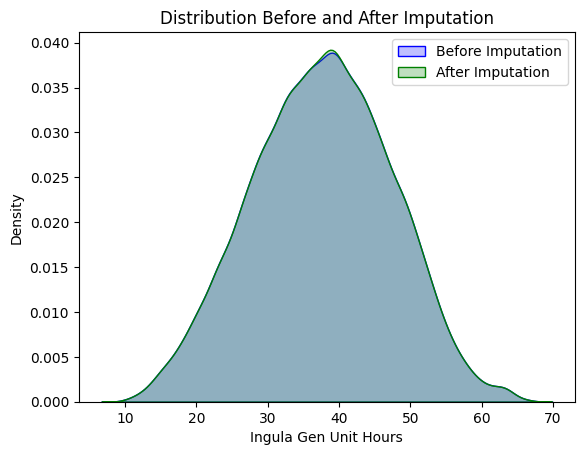

In [13]:
# Plot the distribution before imputationof "Ingula Gen Unit Hours"
column_to_impute = 'Ingula Gen Unit Hours'
sns.kdeplot(data[column_to_impute].dropna(), color='blue', label='Before Imputation', fill=True)

# Plot the distribution after imputation
sns.kdeplot(new_data[column_to_impute], color='green', label='After Imputation', fill=True)

# Set plot title and labels
plt.title('Distribution Before and After Imputation')
plt.xlabel(column_to_impute)
plt.ylabel('Density')
plt.legend()
plt.show()

We can see that mode imputation was a good technique for this dataset because we did not change the data much. This claim finds it's basis/evidence from the density plot/distribution from the above chart.

In [14]:
# Number of duplicate rows
print(f"There are {new_data.duplicated().sum()} duplicate records")

There are 0 duplicate records


In [15]:
# Convert 'Date Time Hour Beginning' to datetime type
new_data['Date Time Hour Beginning'] = pd.to_datetime(new_data['Date Time Hour Beginning'])

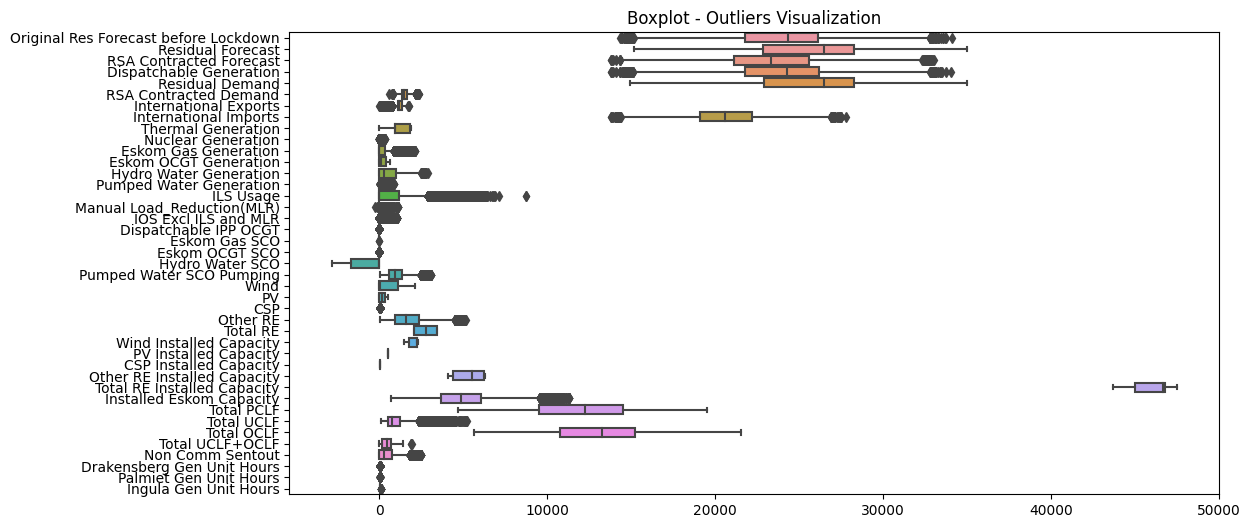

In [16]:
#Outliers
# We define a function to detect outliers using Z-scores
def detect_outliers_zscore(data, threshold=3):
    z_scores = stats.zscore(data)
    return abs(z_scores) > threshold

# Create a DataFrame containing True for outliers and False for non-outliers, but exclude 'Date Time Hour Beginning' column because it's non-numeric
#outliers = new_data.loc[:,new_data!='Date Time Hour Beginning'].apply(detect_outliers_zscore)

# Exclude 'Date Time Hour Beginning' column
columns_to_exclude = ['Date Time Hour Beginning']
numeric_columns = new_data.select_dtypes(include='number').columns
columns_to_check = [col for col in numeric_columns if col not in columns_to_exclude]

outliers = new_data[columns_to_check].apply(detect_outliers_zscore)

# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=new_data, orient='h')
plt.title('Boxplot - Outliers Visualization')
plt.show()

In [17]:
new_data.describe()

C:\Users\phall\AppData\Local\Temp\ipykernel_7588\1011660742.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  new_data.describe()


,Date Time Hour Beginning,Original Res Forecast before Lockdown,Residual Forecast,RSA Contracted Forecast,Dispatchable Generation,Residual Demand,RSA Contracted Demand,International Exports,International Imports,Thermal Generation,Nuclear Generation,Eskom Gas Generation,Eskom OCGT Generation,Hydro Water Generation,Pumped Water Generation,ILS Usage,Manual Load_Reduction(MLR),IOS Excl ILS and MLR,Dispatchable IPP OCGT,Eskom Gas SCO,Eskom OCGT SCO,Hydro Water SCO,Pumped Water SCO Pumping,Wind,PV,CSP,Other RE,Total RE,Wind Installed Capacity,PV Installed Capacity,CSP Installed Capacity,Other RE Installed Capacity,Total RE Installed Capacity,Installed Eskom Capacity,Total PCLF,Total UCLF,Total OCLF,Total UCLF+OCLF,Non Comm Sentout,Drakensberg Gen Unit Hours,Palmiet Gen Unit Hours,Ingula Gen Unit Hours
count,42216,42216.0,42216.0,42216.00,42216.00,42216.000,42216.000,42216.0,42216.0,42216.0,42216.0,42216.0,42216.0,42216.0,42216.0,42216.0,42216.0,42216.0,42216.0,42216.0,42216.0,42216.0,42216.000,42216.0,42216.0,42216.000,42216.000,42216.00,42216.00,42216.0,42216.00,42216.00,42216.0,42216.0,42216.000,42216.0,42216.0,42216.0,42216.0,42216.0,42216.0,42216.00
unique,42216,41784.0,42059.0,40338.00,40920.00,42130.000,41204.000,8489.0,22687.0,7029.0,161.0,5756.0,3390.0,8231.0,224.0,13262.0,1209.0,9765.0,608.0,471.0,7.0,9154.0,41775.000,23272.0,29992.0,21107.000,41951.000,13.00,14.00,1.0,3.00,28.00,17.0,9592.0,41842.000,24431.0,11100.0,919.0,2919.0,232.0,225.0,1671.00
top,2019-04-01 00:00:00,26003.0,28749.0,21390.27,21390.27,27908.271,1430.028,1145.0,20271.0,913.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,-15.0,491.614,0.0,0.0,9.815,548.726,2079.76,2212.09,500.0,21.78,4075.73,46686.0,2958.0,5181.677,350.0,15240.0,2.0,0.0,88.6,47.6,38.31
freq,1,4.0,3.0,5.00,5.00,2.000,3.000,141.0,14.0,1111.0,41991.0,28425.0,16021.0,14705.0,41074.0,28898.0,37884.0,31995.0,27362.0,4669.0,36303.0,872.0,3.000,17902.0,10714.0,11.000,3.000,13344.00,15000.00,42216.0,16704.00,7752.00,10776.0,172.0,8.000,185.0,16.0,149.0,20813.0,727.0,1224.0,174.00
first,2019-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2024-01-23 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


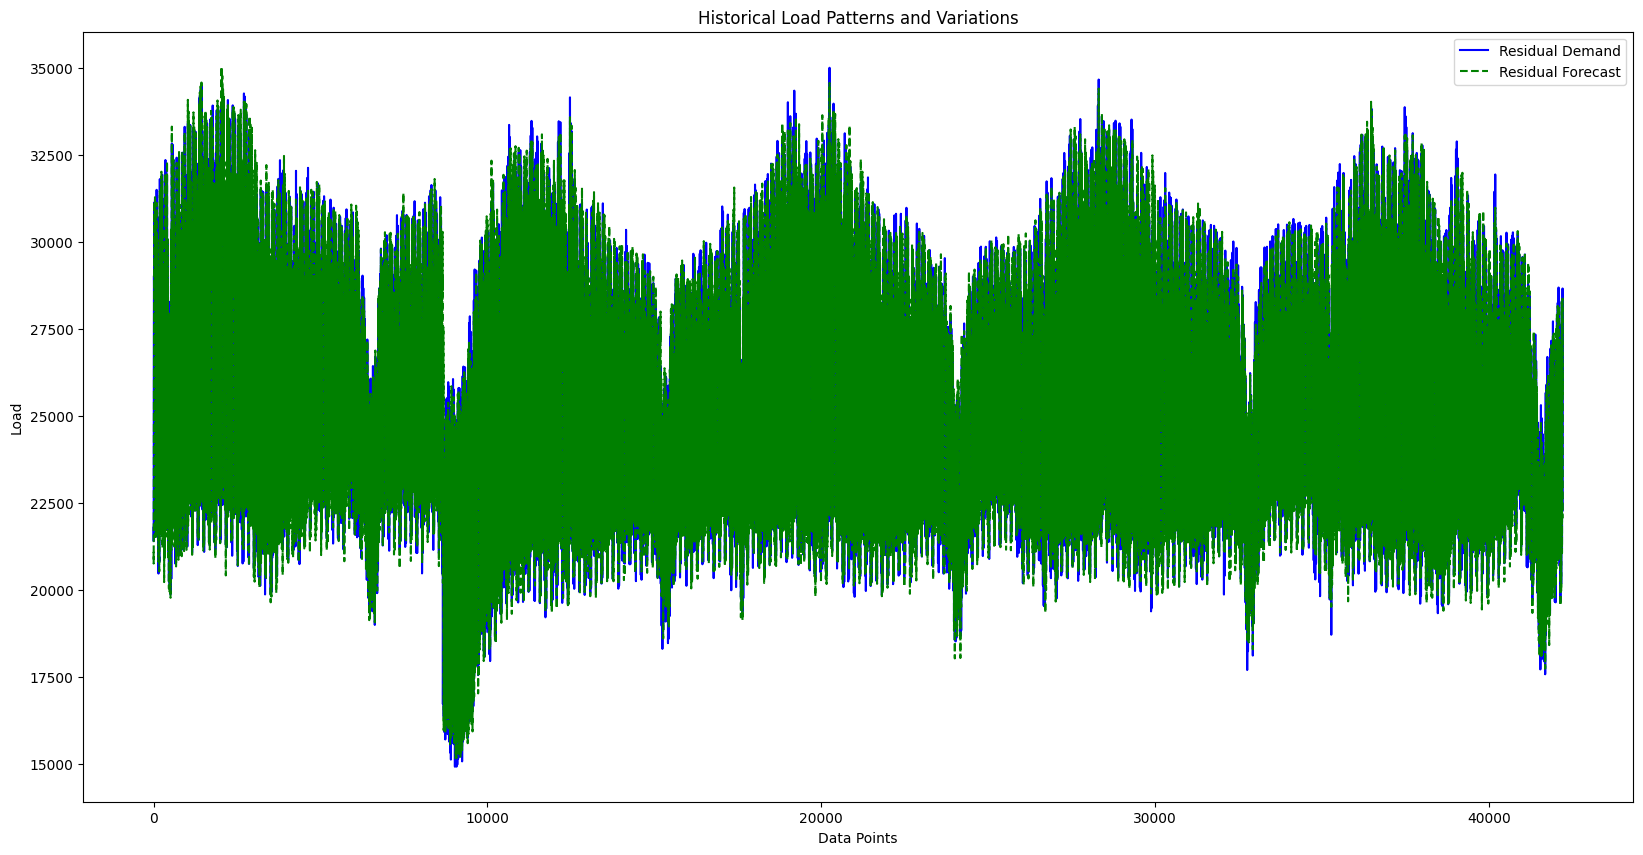

In [18]:
# Plotting Residual Demand and Residual Forecast over time
plt.figure(figsize=(20, 10))
plt.plot(new_data['Residual Demand'], label='Residual Demand', color='blue')
plt.plot(new_data['Residual Forecast'], label='Residual Forecast', color='green', linestyle='dashed')
plt.title('Historical Load Patterns and Variations')
plt.xlabel('Data Points')
plt.ylabel('Load')
plt.legend()
plt.show()

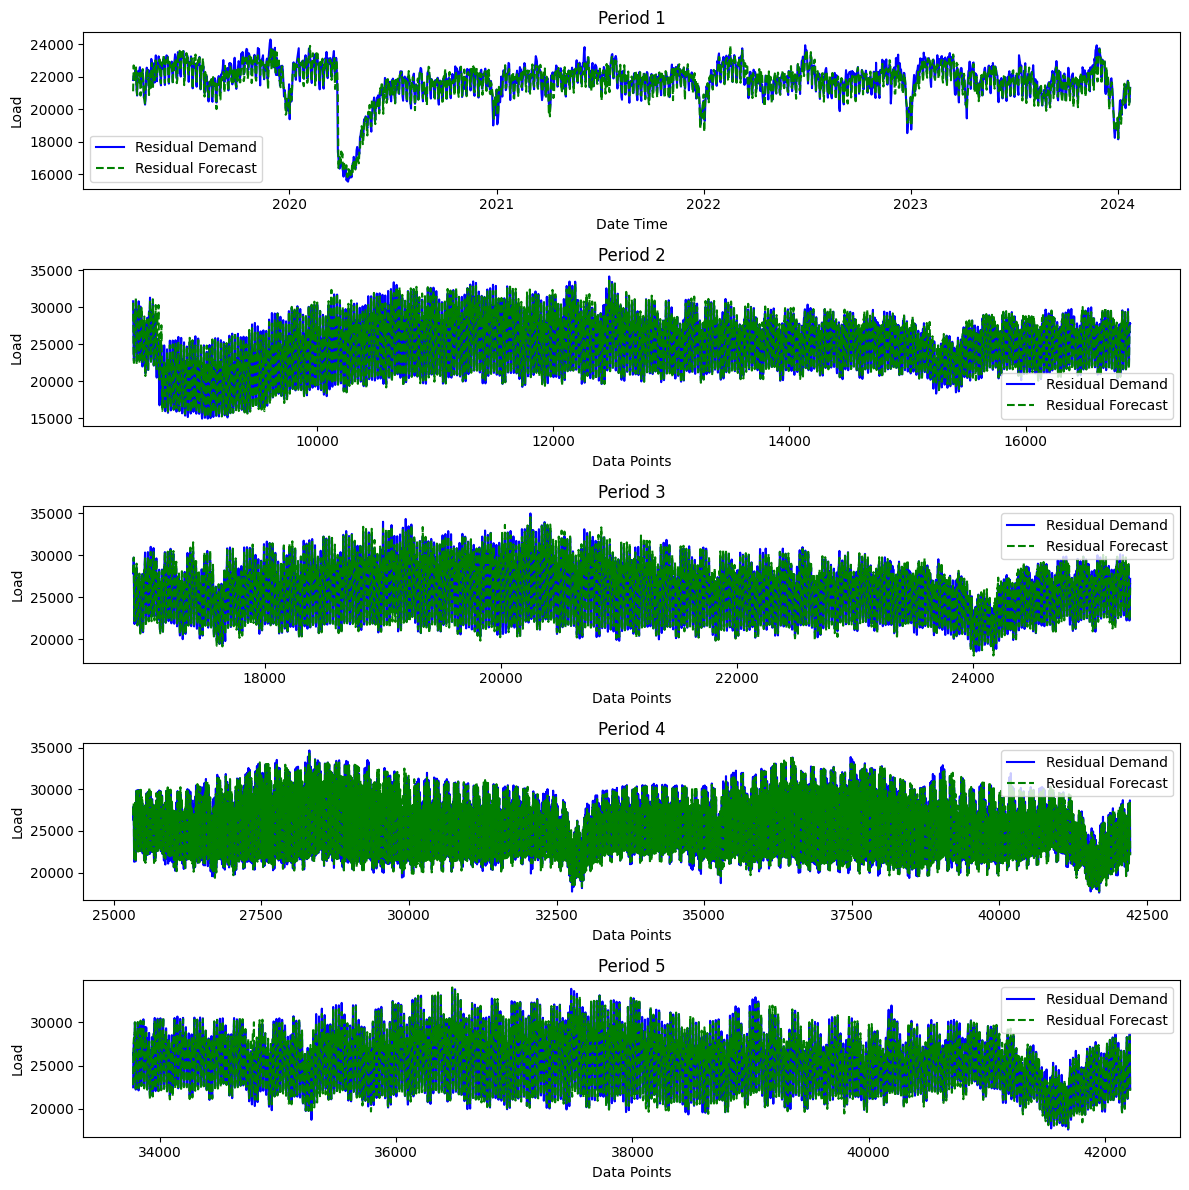

In [19]:
# Calculate the number of data points in each period
num_data_points = len(new_data)
points_per_period = num_data_points // 5

# Extract only the records corresponding to the first hour of each month
first_hour_of_each_month = new_data[new_data['Date Time Hour Beginning'].dt.hour == 0]

# Plotting Residual Demand and Residual Forecast for each period
plt.figure(figsize=(12, 12))

# Plot for Period 1
plt.subplot(5, 1, 1)
plt.plot(first_hour_of_each_month['Date Time Hour Beginning'], first_hour_of_each_month['Residual Demand'],
         label='Residual Demand', color='blue')
plt.plot(first_hour_of_each_month['Date Time Hour Beginning'], first_hour_of_each_month['Residual Forecast'],
         label='Residual Forecast', color='green', linestyle='dashed')
plt.title('Period 1')
plt.xlabel('Date Time')
plt.ylabel('Load')
plt.legend()

# Plot for Period 2
plt.subplot(5, 1, 2)
plt.plot(new_data['Residual Demand'][points_per_period:2*points_per_period], label='Residual Demand', color='blue')
plt.plot(new_data['Residual Forecast'][points_per_period:2*points_per_period], label='Residual Forecast', color='green', linestyle='dashed')
plt.title('Period 2')
plt.xlabel('Data Points')
plt.ylabel('Load')
plt.legend()

# Plot for Period 3
plt.subplot(5, 1, 3)
plt.plot(new_data['Residual Demand'][2*points_per_period:3*points_per_period], label='Residual Demand', color='blue')
plt.plot(new_data['Residual Forecast'][2*points_per_period:3*points_per_period], label='Residual Forecast', color='green', linestyle='dashed')
plt.title('Period 3')
plt.xlabel('Data Points')
plt.ylabel('Load')
plt.legend()

# Plot for Period 4
plt.subplot(5, 1, 4)
plt.plot(new_data['Residual Demand'][3*points_per_period:], label='Residual Demand', color='blue')
plt.plot(new_data['Residual Forecast'][3*points_per_period:], label='Residual Forecast', color='green', linestyle='dashed')
plt.title('Period 4')
plt.xlabel('Data Points')
plt.ylabel('Load')
plt.legend()

# Plot for Period 5
plt.subplot(5, 1, 5)
plt.plot(new_data['Residual Demand'][4*points_per_period:], label='Residual Demand', color='blue')
plt.plot(new_data['Residual Forecast'][4*points_per_period:], label='Residual Forecast', color='green', linestyle='dashed')
plt.title('Period 5')
plt.xlabel('Data Points')
plt.ylabel('Load')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

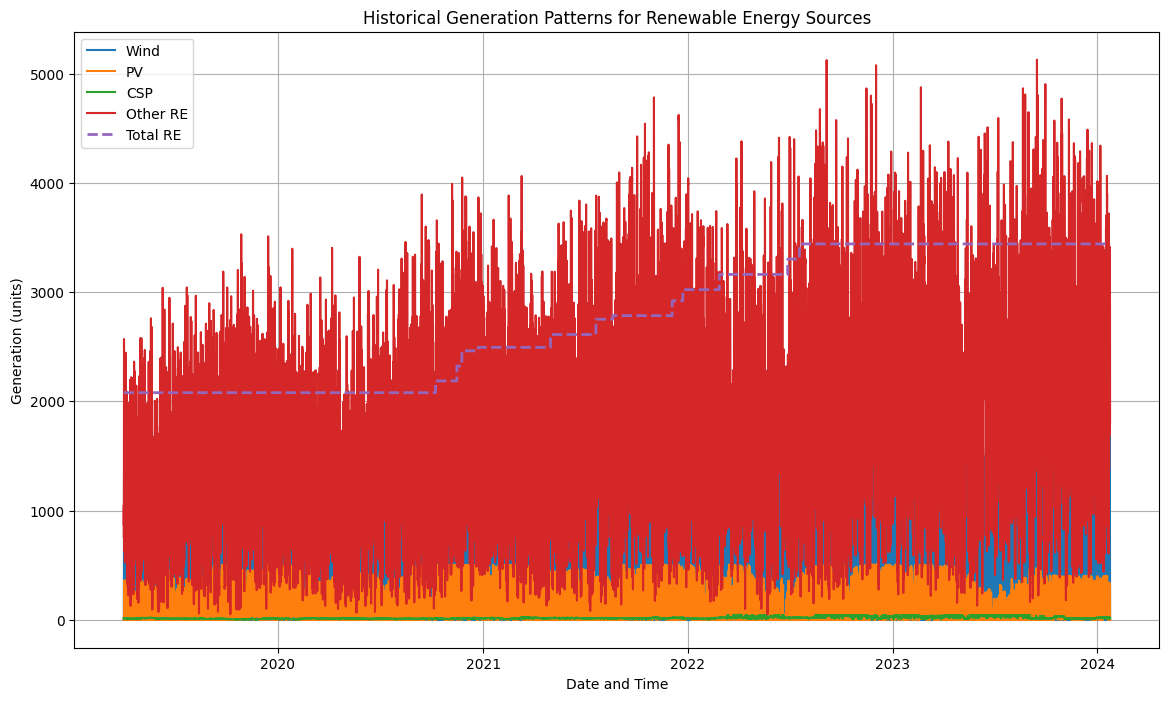

In [20]:
# Plot historical generation patterns for renewable energy sources
plt.figure(figsize=(14, 8))

colum = new_data['Date Time Hour Beginning']

# Plot individual renewable energy sources
for column in ['Wind', 'PV', 'CSP', 'Other RE']:
    plt.plot(colum, new_data[column], label=column)

# Plot total renewable energy
plt.plot(colum, new_data['Total RE'], label='Total RE', linestyle='--', linewidth=2)

# Customize the plot
plt.title('Historical Generation Patterns for Renewable Energy Sources')
plt.xlabel('Date and Time')
plt.ylabel('Generation (units)')
plt.legend()
plt.grid(True)
plt.show()

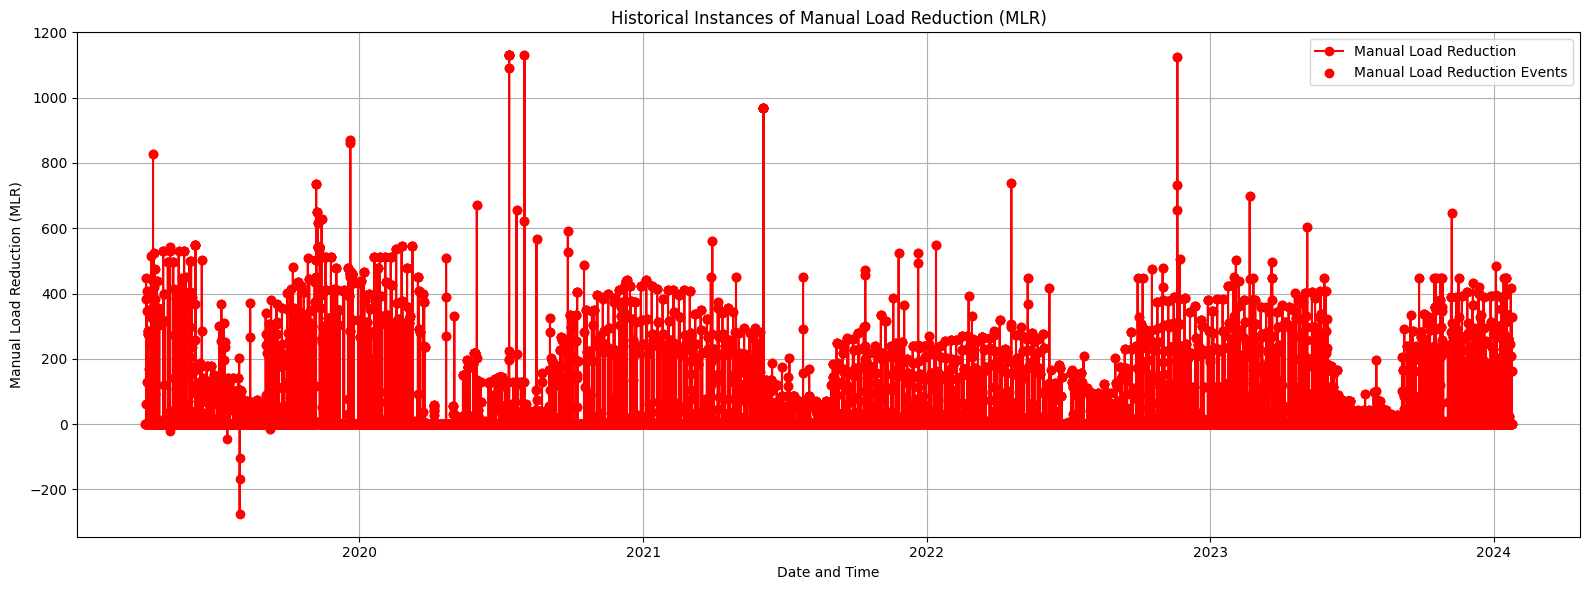

In [21]:
# Plot historical instances of Manual Load Reduction (MLR)
plt.figure(figsize=(16, 6))

# Plot the 'Manual Load_Reduction (MLR)' column without setting the index
plt.plot(new_data['Date Time Hour Beginning'], new_data['Manual Load_Reduction(MLR)'],
         marker='o', linestyle='-', color='red', label='Manual Load Reduction')

# Highlight instances where Manual Load Reduction occurred (MLR > 0)
plt.scatter(new_data['Date Time Hour Beginning'][new_data['Manual Load_Reduction(MLR)'] > 0],
            new_data['Manual Load_Reduction(MLR)'][new_data['Manual Load_Reduction(MLR)'] > 0],
            color='red', marker='o', label='Manual Load Reduction Events')

# Customize the plot
plt.title('Historical Instances of Manual Load Reduction (MLR)')
plt.xlabel('Date and Time')
plt.ylabel('Manual Load Reduction (MLR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


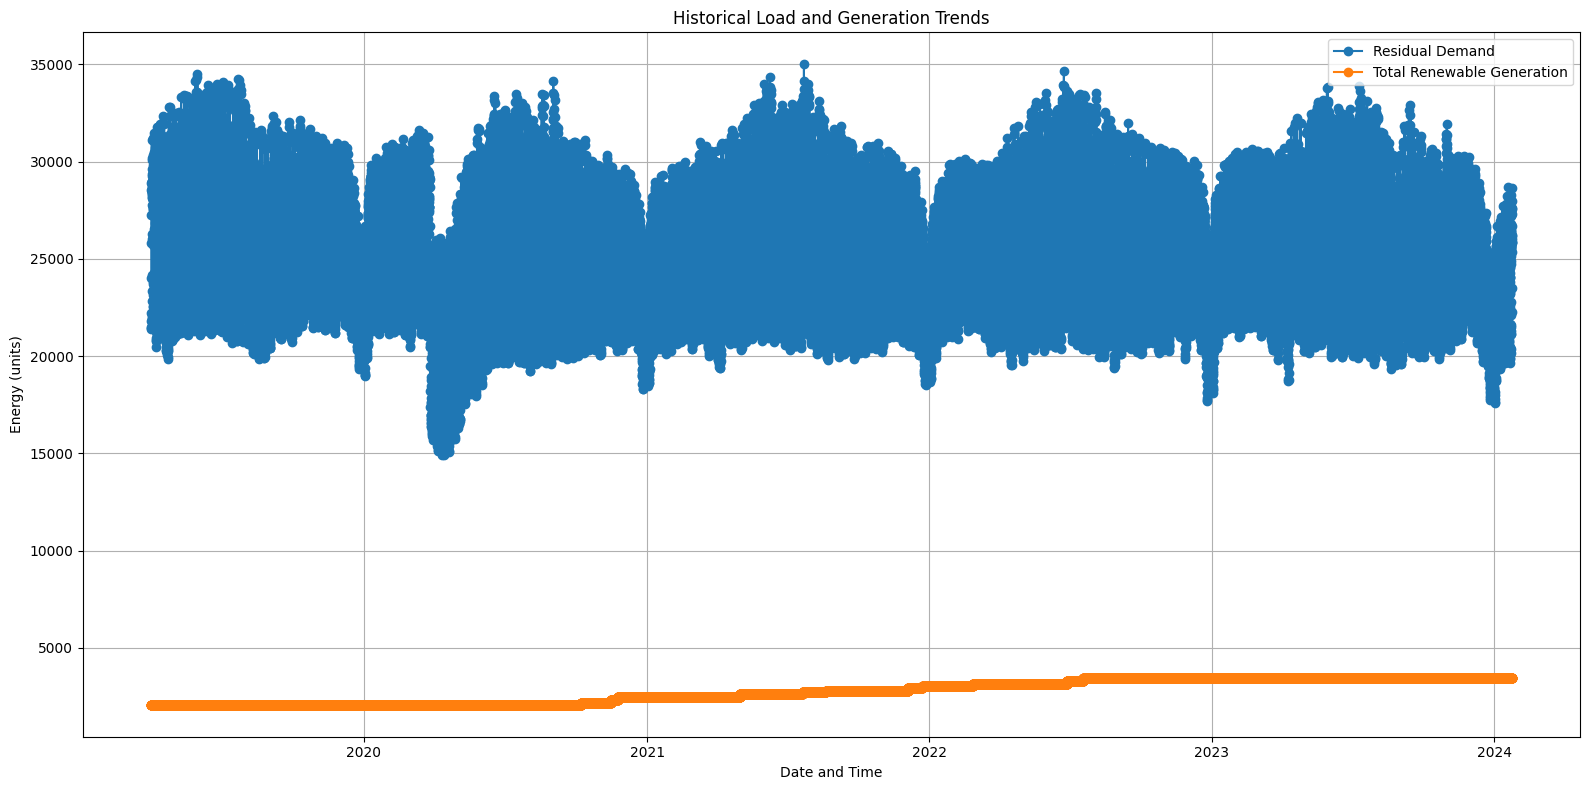

In [22]:
# Ploting historical load and generation trends
plt.figure(figsize=(16, 8))

# Plot the 'Residual Demand' and 'Total RE' columns without setting the index
plt.plot(new_data['Date Time Hour Beginning'], new_data['Residual Demand'], label='Residual Demand', linestyle='-', marker='o')
plt.plot(new_data['Date Time Hour Beginning'], new_data['Total RE'], label='Total Renewable Generation', linestyle='-', marker='o')

# Customize the plot
plt.title('Historical Load and Generation Trends')
plt.xlabel('Date and Time')
plt.ylabel('Energy (units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**PV**, **Wind**, **CSP**, and **Other RE** are the variables that speak of Renewable Energy measured in MW.
- Other RE – Generation from other smaller contracted renewables (small hydro, biomass, landfill gas, etc.).

Hourly OCLF and UCLF are measured in MW

**Residual Peak**, **RSA Contracted Peak Demand**, **Residual Peak Demand**, **Residual Peak Forecast**, & **RSA Contracted Demand** are measured in MW.

**ABBREVIATIONS** 
- **CSP**: Total Concentrated Solar Power generation
- 

In [23]:
# Group by month and calculate the mean for each column
monthly_averages = new_data.groupby(new_data['Date Time Hour Beginning'].dt.to_period("M")).mean()

monthly_averages.head(2)

,Date Time Hour Beginning,Original Res Forecast before Lockdown,Residual Forecast,RSA Contracted Forecast,Dispatchable Generation,Residual Demand,RSA Contracted Demand,International Exports,International Imports,Thermal Generation,Nuclear Generation,Eskom Gas Generation,Eskom OCGT Generation,Hydro Water Generation,Pumped Water Generation,ILS Usage,Manual Load_Reduction(MLR),IOS Excl ILS and MLR,Dispatchable IPP OCGT,Eskom Gas SCO,Eskom OCGT SCO,Hydro Water SCO,Pumped Water SCO Pumping,Wind,PV,CSP,Other RE,Total RE,Wind Installed Capacity,PV Installed Capacity,CSP Installed Capacity,Other RE Installed Capacity,Total RE Installed Capacity,Installed Eskom Capacity,Total PCLF,Total UCLF,Total OCLF,Total UCLF+OCLF,Non Comm Sentout,Drakensberg Gen Unit Hours,Palmiet Gen Unit Hours,Ingula Gen Unit Hours
Date Time Hour Beginning,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04,2019-04-15 23:30:00,24941.437169,26086.691013,25059.809239,25085.148453,26237.720786,1557.005922,957.726944,22072.410764,1848.040278,0.040278,189.711111,84.875000,521.008333,4.64625,0.0,20.692964,48.618767,-2.000000,-1.411125,0.0,-659.211111,662.971533,347.490332,132.659818,9.450650,1152.572333,2079.76,1474.19,500.0,21.78,4075.73,44104.0,5420.780822,8230.965510,578.940107,8809.416667,455.952782,1372.736625,81.950000,42.096667,41.681910
2019-05,2019-05-16 11:30:00,25995.732319,27040.630716,26064.148239,26096.417191,27164.832702,1758.569046,1195.090054,23382.042957,1495.623656,0.096774,23.713710,96.389785,557.810484,8.61922,0.0,23.649731,39.854906,-1.998656,-2.302043,0.0,-722.173387,634.386450,311.673894,107.572738,14.782429,1068.415511,2079.76,1474.19,500.0,21.78,4075.73,44104.0,4151.802989,7876.867208,588.574567,8464.936828,464.512097,1628.312628,85.528629,44.588454,34.555598


In [24]:
monthly_averages.shape

(58, 42)

This means we have 58 months across the 42 variables.

In [25]:
# Group by month and calculate mean mean for each column remaining column
weekly_average = new_data.groupby(new_data['Date Time Hour Beginning'].dt.to_period("W")).mean()

weekly_average.head(2)

,Date Time Hour Beginning,Original Res Forecast before Lockdown,Residual Forecast,RSA Contracted Forecast,Dispatchable Generation,Residual Demand,RSA Contracted Demand,International Exports,International Imports,Thermal Generation,Nuclear Generation,Eskom Gas Generation,Eskom OCGT Generation,Hydro Water Generation,Pumped Water Generation,ILS Usage,Manual Load_Reduction(MLR),IOS Excl ILS and MLR,Dispatchable IPP OCGT,Eskom Gas SCO,Eskom OCGT SCO,Hydro Water SCO,Pumped Water SCO Pumping,Wind,PV,CSP,Other RE,Total RE,Wind Installed Capacity,PV Installed Capacity,CSP Installed Capacity,Other RE Installed Capacity,Total RE Installed Capacity,Installed Eskom Capacity,Total PCLF,Total UCLF,Total OCLF,Total UCLF+OCLF,Non Comm Sentout,Drakensberg Gen Unit Hours,Palmiet Gen Unit Hours,Ingula Gen Unit Hours
Date Time Hour Beginning,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-01/2019-04-07,2019-04-04 11:30:00,25033.638143,26319.404161,24941.569042,24968.086702,26286.184226,1434.679881,966.401190,21913.987024,1847.982143,0.0,278.065476,73.607143,504.440476,7.885714,0.0,18.631946,12.351720,-2.0,-1.325655,0.0,-651.940476,816.288185,361.657565,130.048000,10.103774,1318.097524,2079.76,1474.19,500.0,21.78,4075.73,44104.0,6124.122220,8801.979815,531.900893,9333.434524,413.476208,1487.016935,81.998810,41.350655,45.086429
2019-04-08/2019-04-14,2019-04-11 11:30:00,25119.307030,26162.125524,25447.450750,25481.692815,26521.543613,1534.232214,937.797619,22161.181548,1847.684524,0.0,495.333333,66.648810,508.357143,2.678571,0.0,31.563494,89.864262,-2.0,-0.964107,0.0,-656.452381,511.063315,352.066292,167.858679,8.862512,1039.850798,2079.76,1474.19,500.0,21.78,4075.73,44104.0,5527.644065,9314.711208,635.884744,9950.071429,470.928571,1299.839619,75.024405,37.883929,39.227917


In [26]:
weekly_average.shape

(252, 42)

In [28]:
weekly_average.to_csv('ESK8170_Weekly.csv')
monthly_averages.to_csv('ESK8170_Monthly.csv')